In [150]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("whitegrid")
sns.set(rc={
    'axes.facecolor': "#fbfdfd", "axes.grid": True,
    "grid.color": "#aaa", "grid.linestyle": (0, (4, 3)), "grid.linewidth": 1.3,
    "patch.edgecolor": 'black', "patch.linewidth": 1.35, # rub grafova
    "axes.edgecolor": 'black', "lines.linewidth": 2, # rub oko cijelog grafa
})

In [88]:
results = pd.read_csv("../data/results.csv")

In [97]:
results["method"] = results["method"].map({"Principal Component Analysis": "PCA", "Locally linear embedding": "LLE", "Original dimensionality": "original"})

In [100]:
list(results.method.unique())

['original', 'PCA', 'LLE']

In [60]:
results[results.method == "Original dimensionality"]

,Unnamed: 0,model,dataset,score,method,dimension
0,0,Logistic Regression,iris,0.964912,Original dimensionality,4
1,1,Random Forest Classifier,iris,0.973684,Original dimensionality,4
42,42,Linear Regression,california_housing,0.669586,Original dimensionality,8
43,43,Random Forest Regressor,california_housing,0.597463,Original dimensionality,8
76,76,Linear Regression,ames_housing,0.706383,Original dimensionality,80
77,77,Random Forest Regressor,ames_housing,0.778601,Original dimensionality,80
254,254,Logistic Regression,heart_attack,0.855263,Original dimensionality,13
255,255,Random Forest Classifier,heart_attack,0.837719,Original dimensionality,13
256,256,Logistic Regression,stroke,0.961333,Original dimensionality,21
257,257,Random Forest Classifier,stroke,0.961333,Original dimensionality,21


In [44]:
def filter_df(df, model, dataset):
    return df[(df.model == model) & (df.dataset == dataset)]

In [5]:
df = filter_df(results, 'Linear Regression', 'ames_housing')

In [6]:
df

,Unnamed: 0,model,dataset,score,method,dimension
6,6,Linear Regression,ames_housing,0.171138,Principal Component Analysis,1
16,16,Linear Regression,ames_housing,0.631103,Principal Component Analysis,2
26,26,Linear Regression,ames_housing,0.639864,Principal Component Analysis,3
36,36,Linear Regression,ames_housing,0.211325,Locally linear embedding,1
46,46,Linear Regression,ames_housing,0.249278,Locally linear embedding,2
...,...,...,...,...,...,...
480,480,Linear Regression,ames_housing,0.678091,Locally linear embedding,75
482,482,Linear Regression,ames_housing,0.674315,Locally linear embedding,76
484,484,Linear Regression,ames_housing,0.686014,Locally linear embedding,77
486,486,Linear Regression,ames_housing,0.677278,Locally linear embedding,78


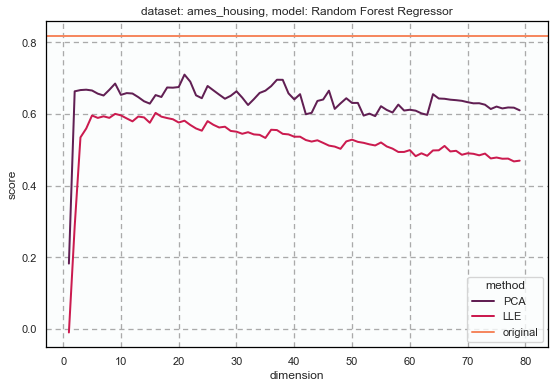

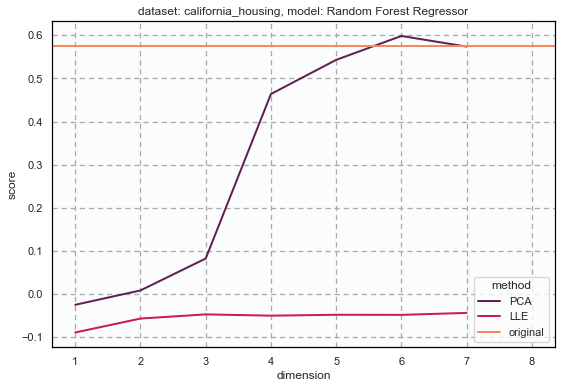

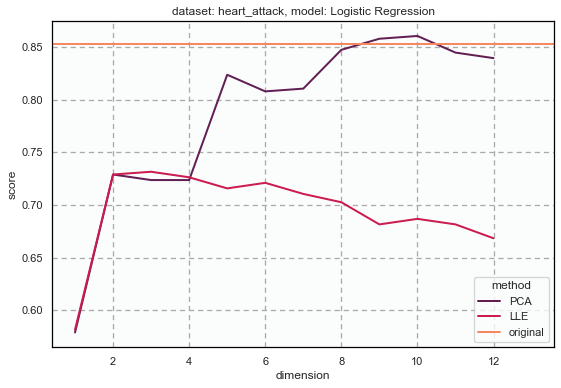

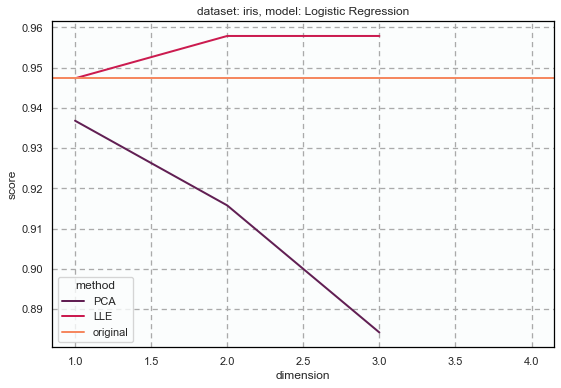

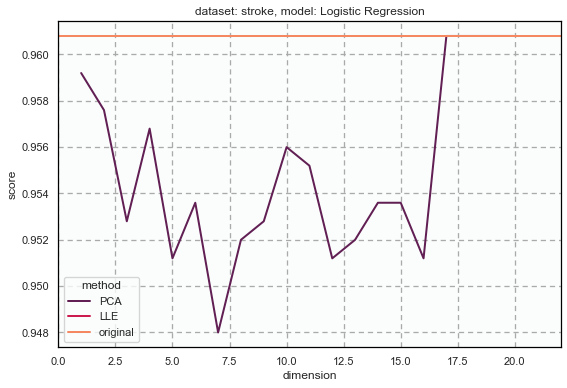

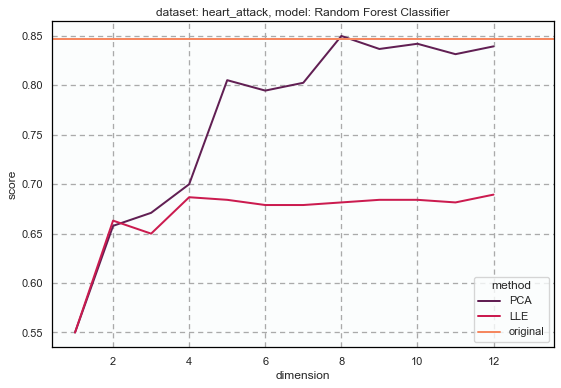

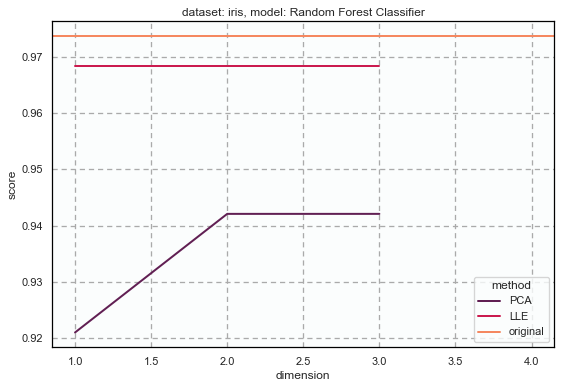

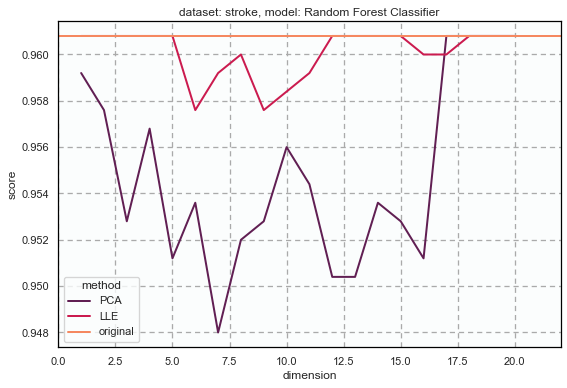

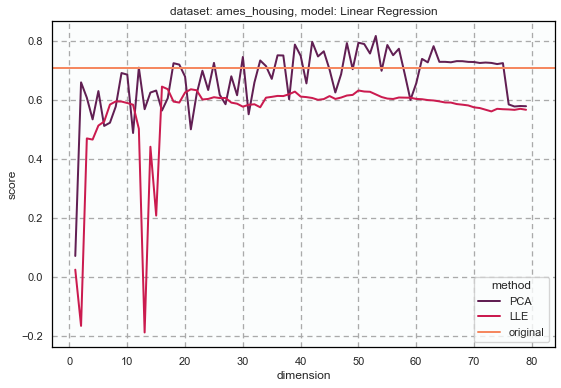

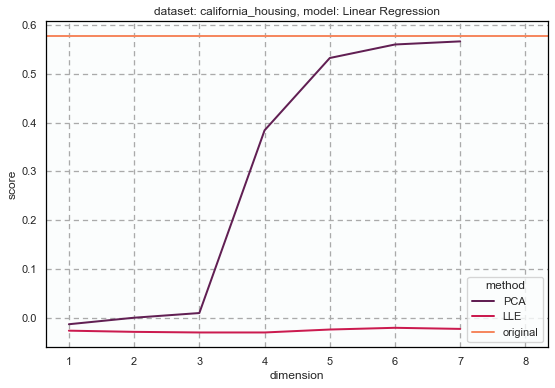

In [151]:
palette = "rocket"

def generate_plot(model, dataset):
    df = filter_df(results, model, dataset).copy()
    # print(df)
    if len(df) != 0:
        plt.figure(figsize=(9, 6))
        plot = sns.lineplot(x = 'dimension', y = 'score', hue = 'method', data = df, palette=palette, hue_order=['PCA', 'LLE', 'original'])

        y = df[df["method"] == "original"]["score"].values[0]
        plt.axhline(y=y, c=sns.color_palette(palette=palette, n_colors=3)[2])
        # plt.ylim(0, 1)
        plt.title(f'dataset: {dataset}, model: {model}')
        fig = plot.get_figure()
        fig.savefig(f"../data/{model}_{dataset}.png")

models = set(results.model.values)
datasets = set(results.dataset.values)

for model in models:
    for dataset in datasets:
        generate_plot(model, dataset)